In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import statsmodels.formula.api as smf 
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [3]:
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import calendar
from math import sqrt
from pandas import datetime
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf 

In [6]:
df = pd.read_excel('CocaCola_Sales_Rawdata (1).xlsx')
df.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [7]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [8]:
df.shape

(42, 2)

In [9]:
df.nunique()

Quarter    42
Sales      42
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [11]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000




# Feature Engineering


In [12]:
df["Quarter_Year"] =  df["Quarter"].str.split('_').apply(lambda x: ' 19'.join(x[:]))   # creating a column with quarter and year

In [13]:
df


,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


In [14]:
df["Date"]  = pd.to_datetime(df["Quarter_Year"].str.split(' ').apply(lambda x: ''.join(x[::-1])))  
# will create a column called as date and to date intialising the date of first quarter to 1
df

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [15]:
df['Quarters'] = df['Quarter'].str[:2] 
# .str accessor to access string methods in pandas and extracts the first two characters from each entry in the 'Quarter' column.

In [16]:
df.head()

,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1


In [17]:
dummy1 = pd.DataFrame(pd.get_dummies(df["Quarters"]))  # one hot encoder for quarters 

df1 = pd.concat((df,dummy1),axis=1)  # concating the df with the dummy variales and forming a new data frame

df1.head()

,Quarter,Sales,Quarter_Year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0


In [18]:
# LET US RETAIN ONLY THE REQUIRED COLUMNS : SALES DATE Q1 Q2 Q3 Q4 AND QUARTERS

df1.drop(['Quarter','Quarter_Year'],axis=1,inplace=True)
df1.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


In [19]:
df1.set_index('Date',inplace=True)

df1

,Sales,Quarters,Q1,Q2,Q3,Q4
Date,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0
1986-04-01,2244.960999,Q2,0,1,0,0
1986-07-01,2533.804993,Q3,0,0,1,0
1986-10-01,2154.962997,Q4,0,0,0,1
1987-01-01,1547.818996,Q1,1,0,0,0
1987-04-01,2104.411995,Q2,0,1,0,0
1987-07-01,2014.362999,Q3,0,0,1,0
1987-10-01,1991.746998,Q4,0,0,0,1
1988-01-01,1869.049999,Q1,1,0,0,0


In [20]:
df['Date']=pd.to_datetime(df.Date,format='%b-%y')
df['Month']=df.Date.dt.strftime('%b') #month extraction
df['year']=df.Date.dt.strftime('%y')  #year extraction
df.head()


,Quarter,Sales,Quarter_Year,Date,Quarters,Month,year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,86
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,86
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,86
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,86
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,87


In [21]:
pivot_table=pd.pivot_table(data=df,values='Sales',index='year',columns='Month',aggfunc='mean',fill_value=0)
pivot_table

Month,Apr,Jan,Jul,Oct
year,,,,
86,2244.960999,1734.827000,2533.804993,2154.962997
87,2104.411995,1547.818996,2014.362999,1991.746998
88,2313.631996,1869.049999,2128.320000,2026.828999
89,2331.164993,1910.603996,2206.549995,2173.967995
90,2739.307999,2148.278000,2792.753998,2556.009995
91,3039.522995,2480.973999,3172.115997,2879.000999
92,3550.000000,2772.000000,3508.000000,3243.859993
93,3899.000000,3056.000000,3629.000000,3373.000000
94,4342.000000,3352.000000,4461.000000,4017.000000


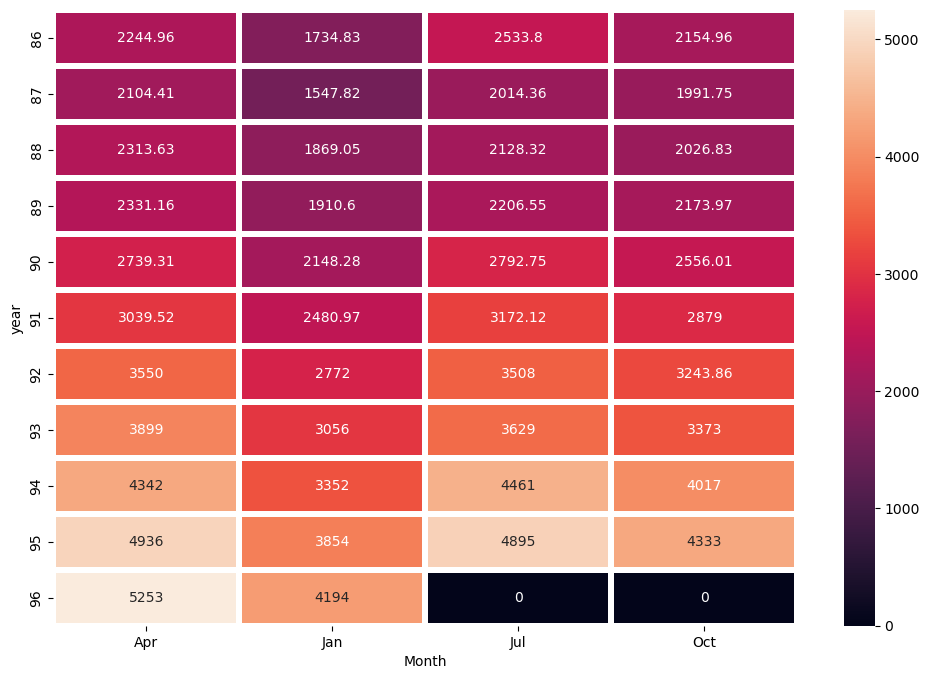

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table,annot=True,fmt='g',linewidth=3)
plt.show()

<Axes: xlabel='Date', ylabel='Sales'>

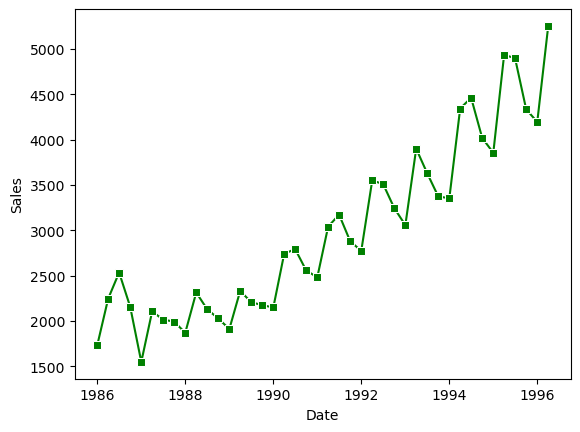

In [23]:
sns.lineplot(data= df1["Sales"],color="green",marker="s")

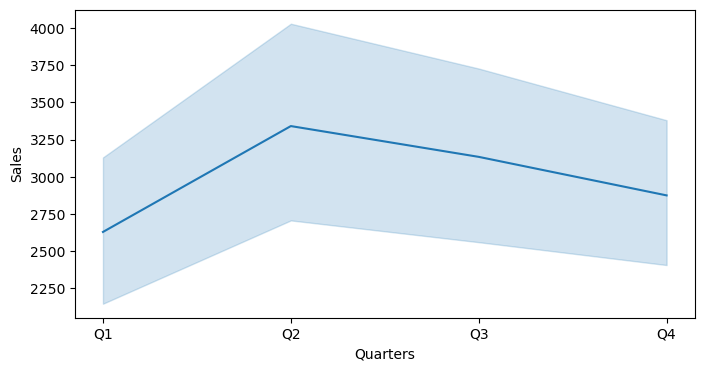

In [24]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Quarters',y='Sales',data=df)
plt.show()

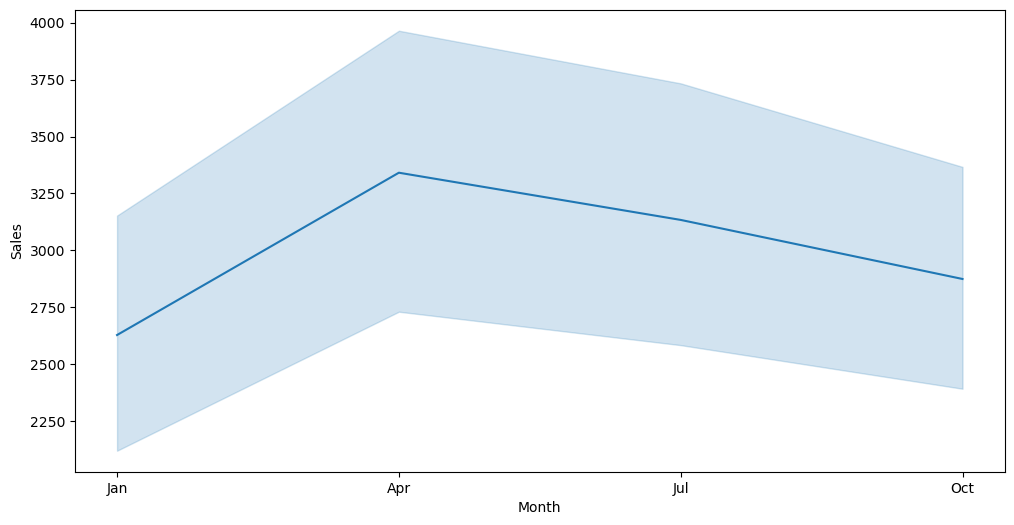

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Month',y='Sales',data=df)
plt.show()

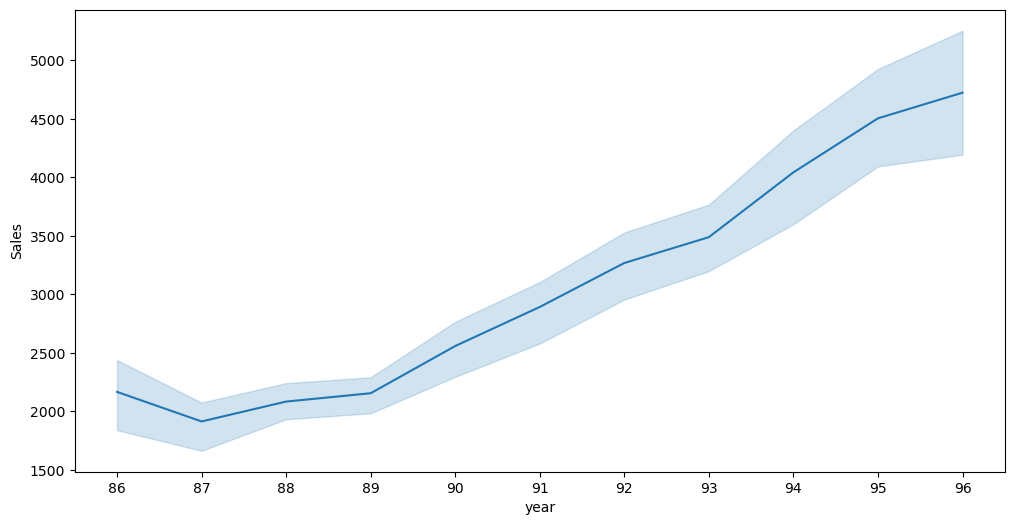

In [26]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='Sales',data=df)
plt.show()

In [27]:
#BOXPLOTS

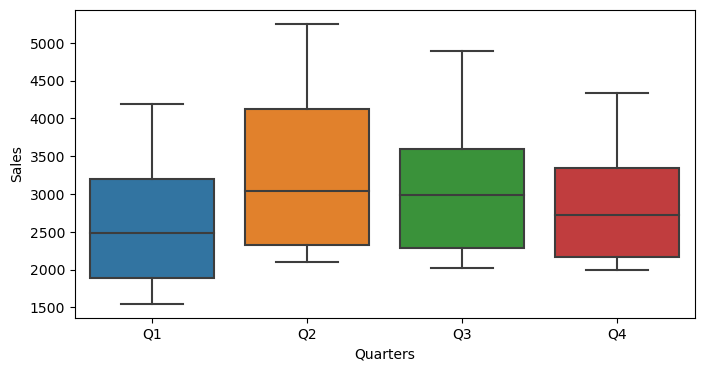

In [26]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Quarters',y='Sales',data=df)
plt.show()

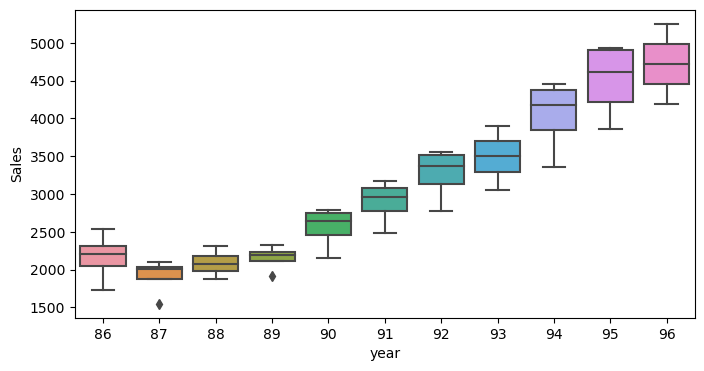

In [28]:
plt.figure(figsize=(8,4))
sns.boxplot(x='year',y='Sales',data=df)
plt.show()

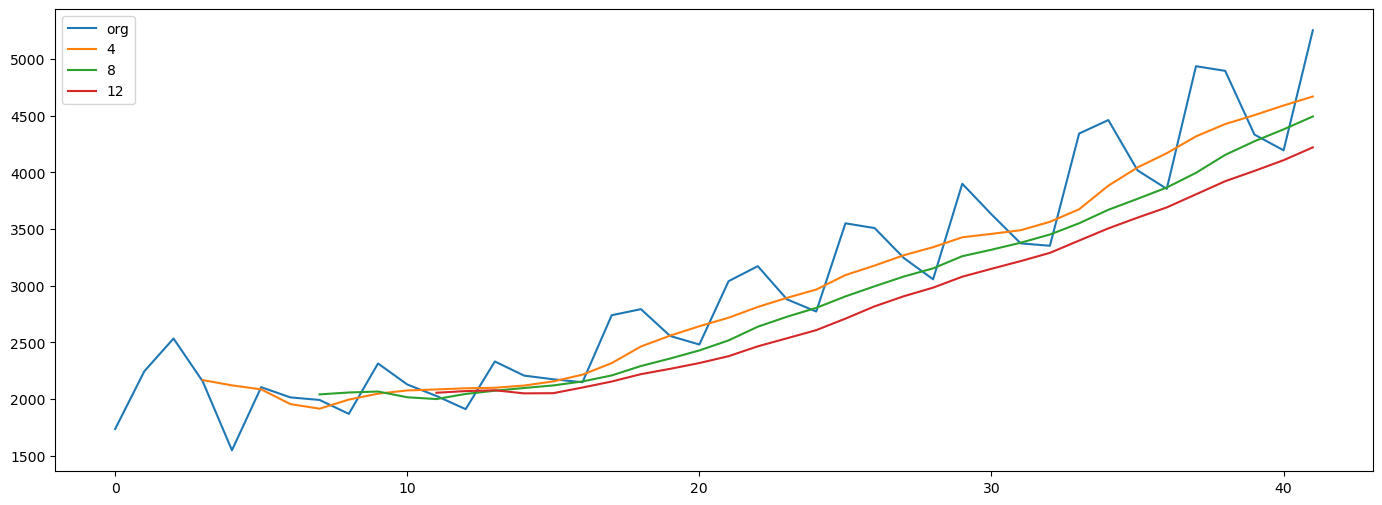

In [29]:
# MOVING AVERAGE OR ROLLING STATS

plt.figure(figsize=(17,6))
df.Sales.plot(label='org')
for i in range (4,13,4): # range of window size 
     df['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [ ]:
#As the moving average of the window size 4 looks more smooth , we will be going with MA = 4 

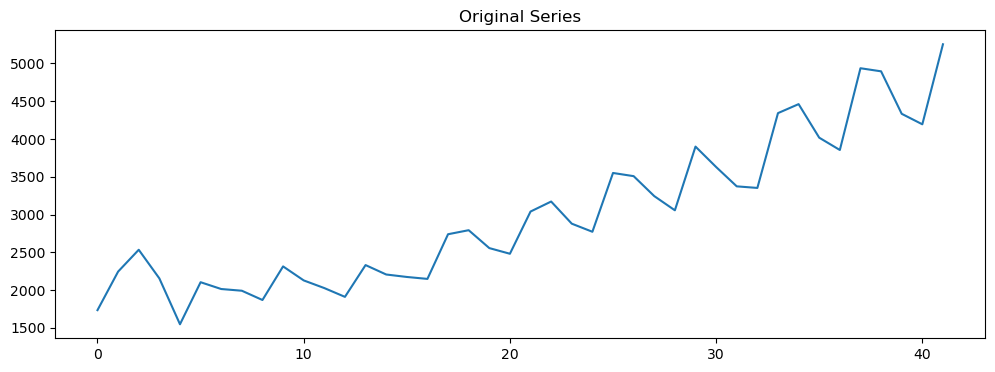

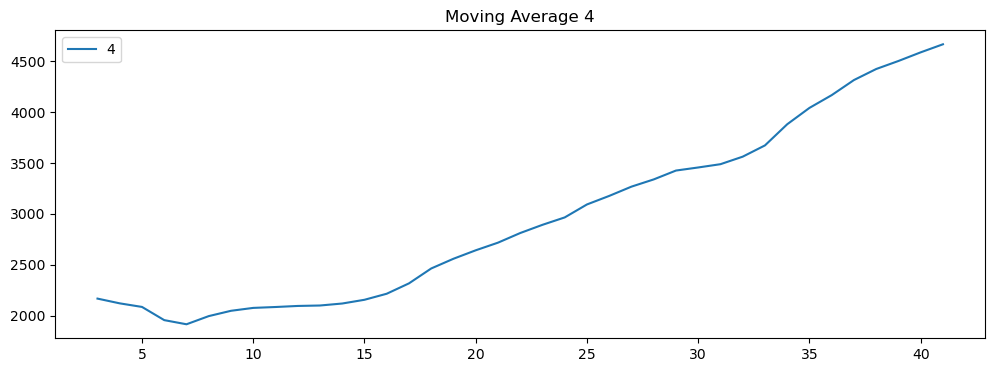

In [30]:
plt.figure(figsize=(12,4))
df.Sales.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(12,4))
df["Sales"].rolling(4).mean().plot(label=str(4))
plt.title("Moving Average "+str(4))
plt.legend(loc='best')
plt.show()

#    TIME SERIES DECOMPOSITION 

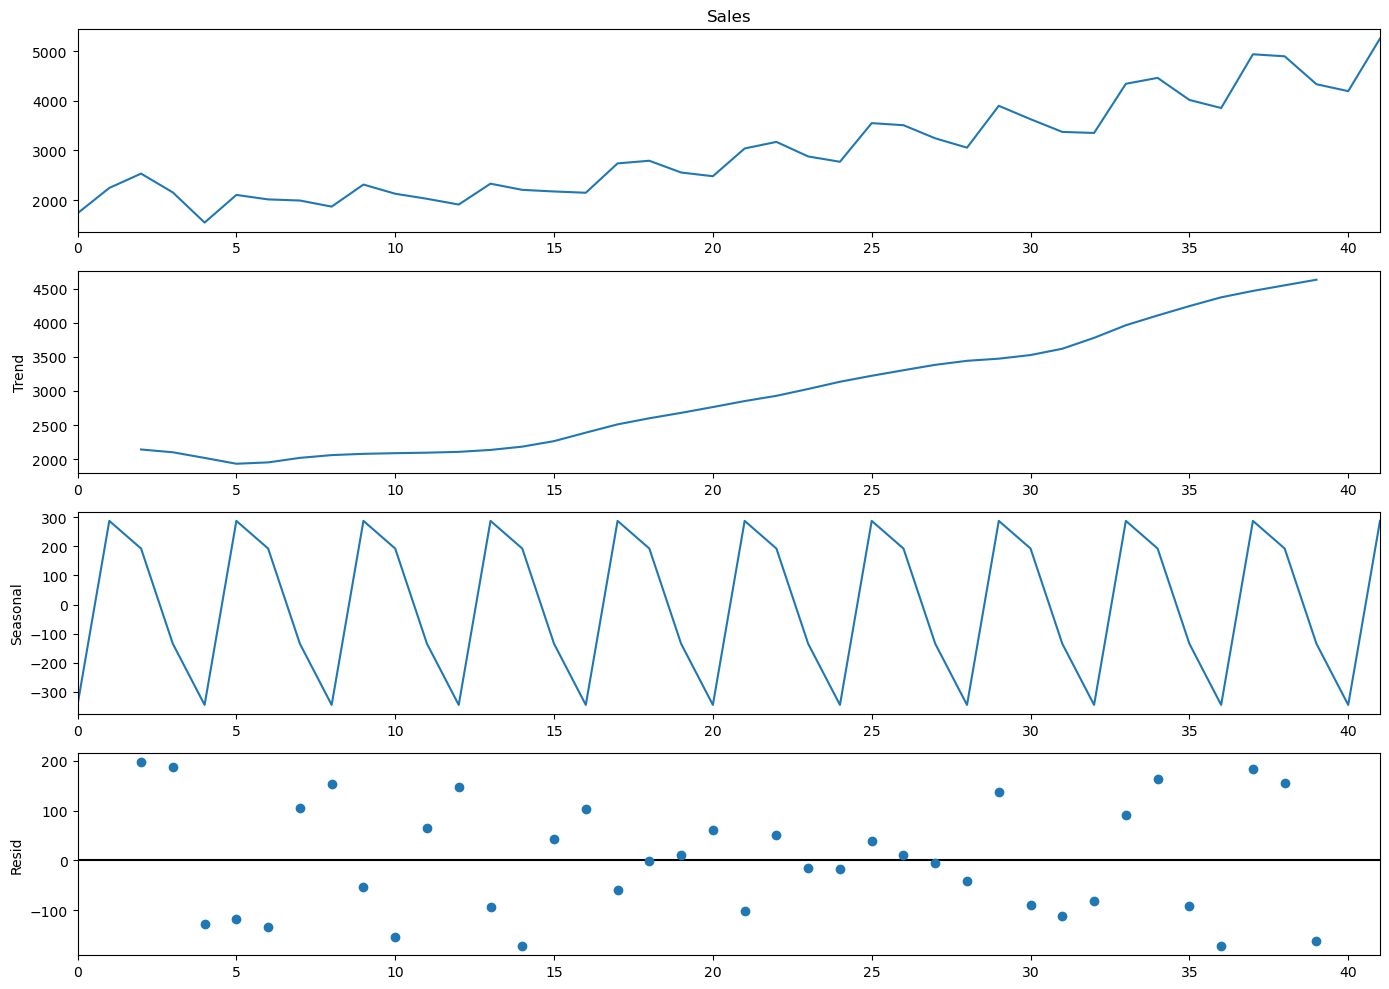

In [31]:
decompose_ts_add = seasonal_decompose(df.Sales,period=4)
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

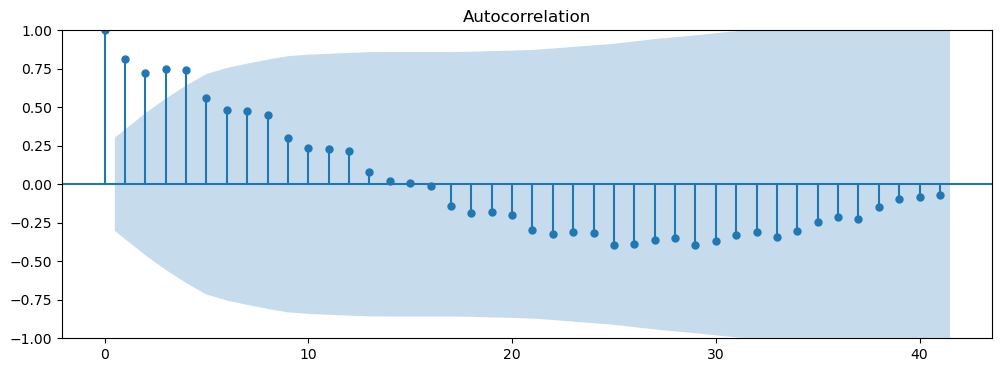

In [70]:
# ACF Plot
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(df.Sales,lags=41)
    plt.show()

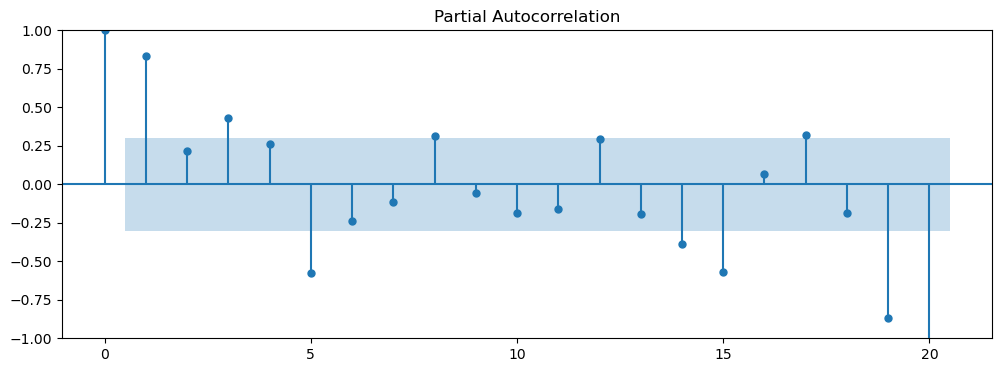

In [71]:
# PACF Plot
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_pacf(df.Sales,lags=20)
    plt.show()

# INTERPOLATION : UPSAMPLING 

In [32]:
upsampled_month=df1.drop(['Quarters','Q1','Q2','Q3','Q4'],axis=1)
upsampled_month=upsampled_month.resample('M').mean()
print(upsampled_month.head())

# WE NEED TO OBTAIN MONTHLY DATA BUT AS WE ONLY HAVE QUARTERLY DATA WE HAVE UPSAMPLE FOR GOOD PREDICTIONS

                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN


In [33]:
interpolated_month=upsampled_month.interpolate(method='linear')
print(interpolated_month.head())

                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330


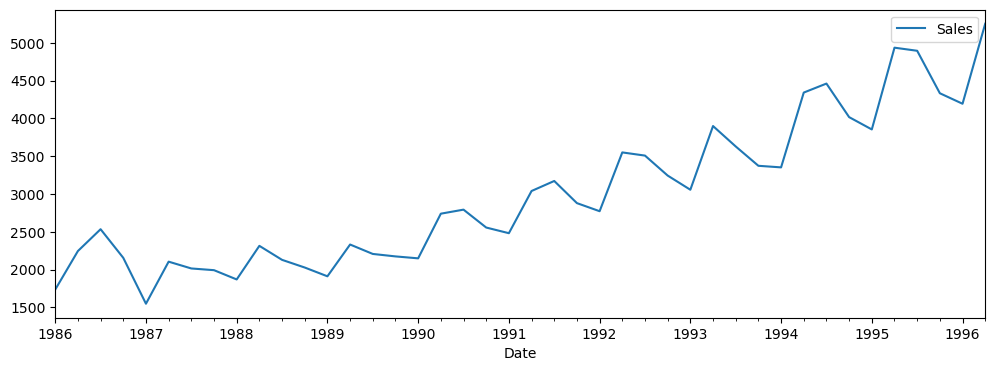

In [34]:
interpolated_month.plot(figsize=(12,4))
plt.show()

In [35]:
interpolated_month

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


# FORECASTING USING ARIMA ( P D Q : P : AR( LAGS) , D : DIFFERENCING , Q MA: RESIDUES)

TEST FOR STATIONARITY OF THE DATA BY ADFULLER TEST

In [36]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test: TO CHECK FOR STATIONARITY OF THE DATA
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

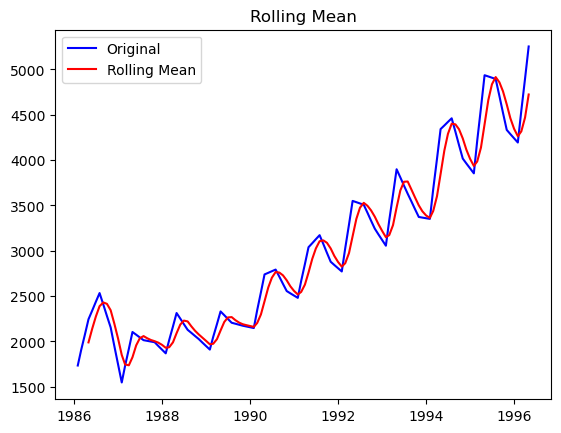

Results of Dickey Fuller Test:
Test Statistic                   0.572599
p-value                          0.986920
#Lags Used                      10.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [37]:
sales= pd.DataFrame()
sales['Sales'] = interpolated_month[['Sales']]
test_stationarity(sales)

In [38]:
#USING HYPOTHESIS TESTING : P VALUE SHOULD BE LESS THAN 0.05 TO REJECT NULL HYPOTHESES AND THEN WE APPLY TRANSFORMATIONS TO OBTAIN A STATIONARY 
# DATA
    
    
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [39]:
adf_test(sales.Sales)

Fail to reject the null hypothesis
Data is non-stationary


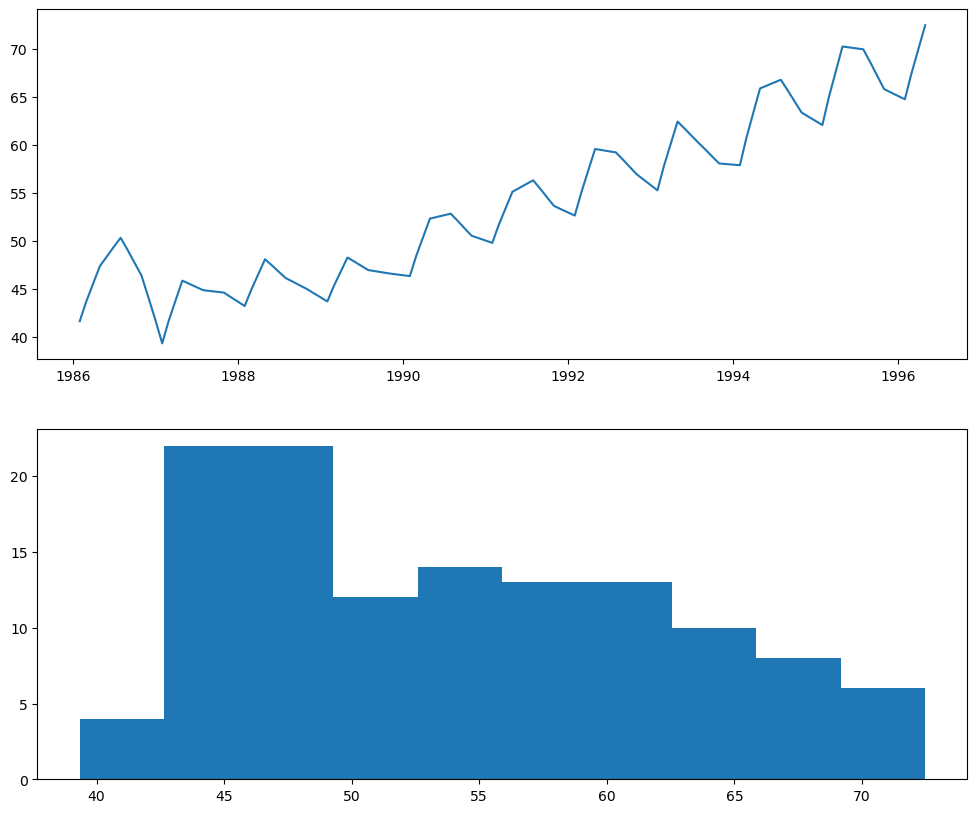

In [40]:
# SQUARE ROOT TRANSFORMATIONS

square_root= pd.DataFrame()
square_root = interpolated_month[['Sales']]
square_root['Sales'] = np.sqrt(square_root.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Sales'])
#Histogram
plt.subplot(212)
plt.hist(square_root['Sales'])
plt.show()

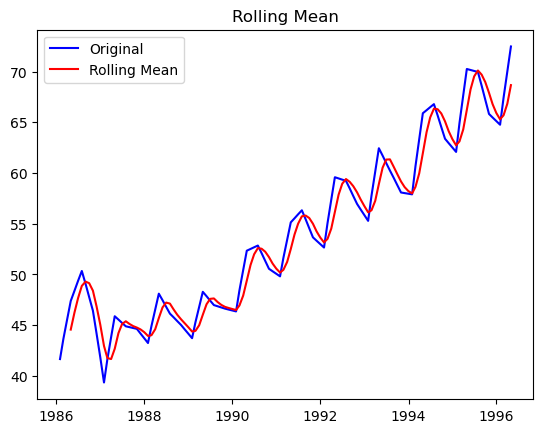

Results of Dickey Fuller Test:
Test Statistic                   0.728012
p-value                          0.990381
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [52]:
test_stationarity(square_root)

In [41]:
adf_test(square_root.Sales)

Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
# BOX COX TRANSFORMATION 

,Sales
Date,
1986-01-31,7.458663
1986-02-28,7.552170
1986-03-31,7.637676
1986-04-30,7.716443
1986-05-31,7.758437


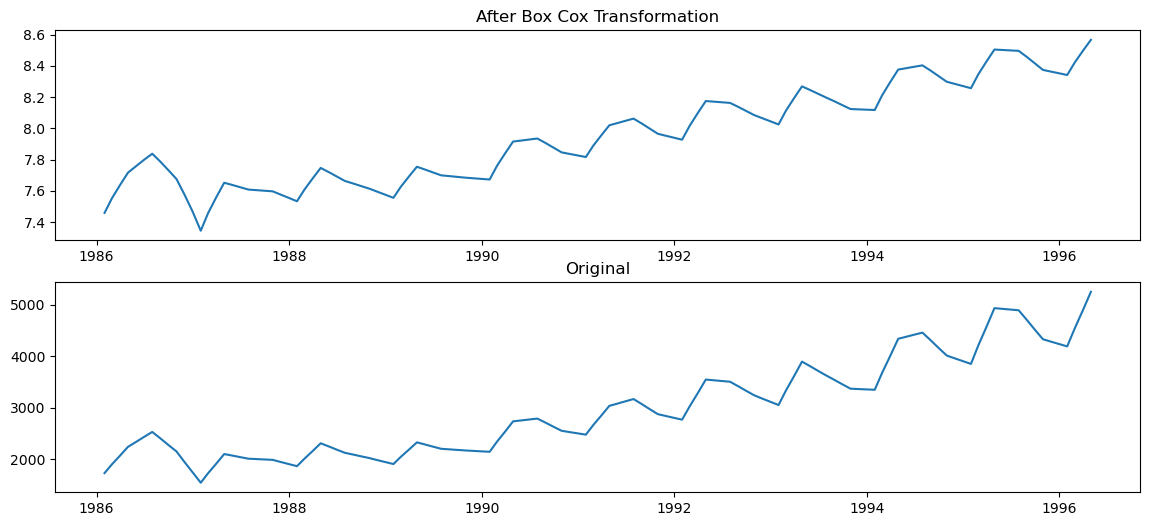

In [42]:
from scipy.stats import boxcox
data_boxcox = pd.DataFrame()
data_boxcox['Sales'] = pd.Series(boxcox(interpolated_month['Sales'], lmbda=0), interpolated_month.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(14,6),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(interpolated_month, label='original')
axis[1].set_title('Original')
plt.show()

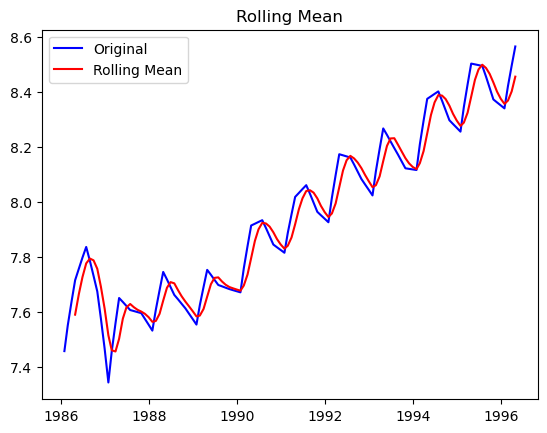

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [57]:
test_stationarity(data_boxcox)

In [43]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


In [59]:
# # Differencing of the Box-Cox Transformation

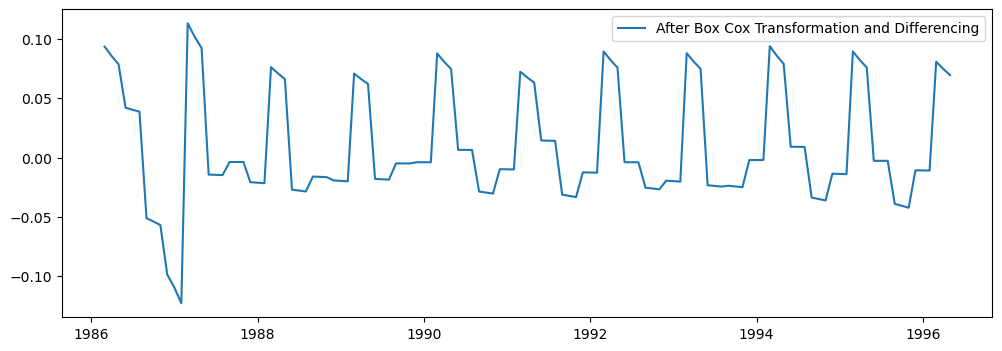

In [44]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

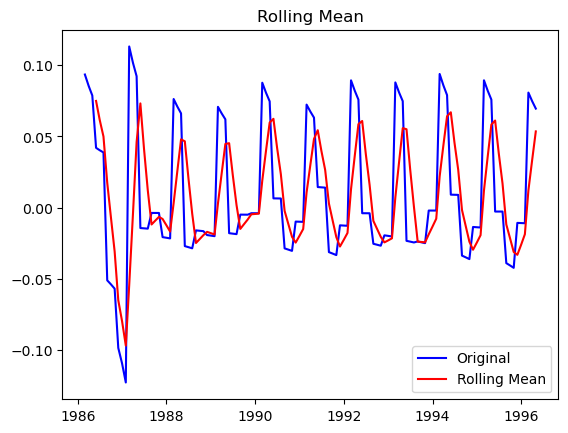

Results of Dickey Fuller Test:
Test Statistic                  -3.030060
p-value                          0.032181
#Lags Used                      12.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [45]:

test_stationarity(data_boxcox_diff)

In [46]:
# NOW THE P VALUE IS LESS THAN 0.5 : 

adf_test(data_boxcox_diff.Sales)

Reject the null hypothesis
Data is stationary


# SPLITTING INO TRAINING AND TESTING 

In [47]:
train_data = interpolated_month[:100]
test_data = interpolated_month[100:]

In [48]:
train_data_boxcox = data_boxcox[:100]
test_data_boxcox = data_boxcox[100:]
train_data_boxcox_diff = data_boxcox_diff[:99]
test_data_boxcox_diff = data_boxcox_diff[99:]

In [ ]:
# MODEL BASED FORECASTING

In [58]:
model = ARIMA(train_data_boxcox_diff, order=(4, 0, 0))
model_fit = model.fit()

y_pred = data_boxcox_diff.copy()

y_pred['ar_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())



# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_pred['ar_forecast'] = y_pred['ar_forecast'].cumsum()


# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_pred['ar_forecast'] = y_pred['ar_forecast'].add(data_boxcox.Sales[0])


# Now doing the reverse transformation 
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_pred['ar_forecast'] = np.exp(y_pred['ar_forecast'])


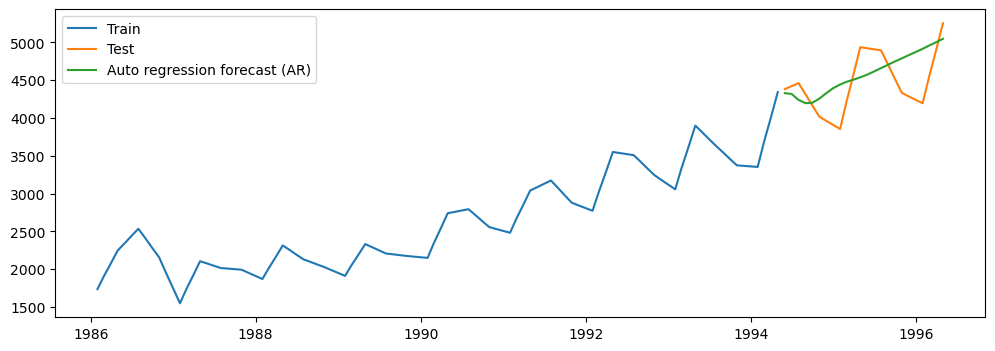

In [59]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_pred['ar_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()


In [60]:
rmse_ARIMA = np.sqrt(mean_squared_error(test_data, y_pred['ar_forecast'][test_data.index.min():])).round(2)
rmse_ARIMA

356.02

In [61]:
quarter = []
for i in range (0, len(df)):
    if 'Q1' in df.Quarter[i]:
        quarter.append('Q1')
    elif 'Q2' in df.Quarter[i]:
        quarter.append('Q2')
    elif 'Q3' in df.Quarter[i]:
        quarter.append('Q3')
    elif 'Q4' in df.Quarter[i]:
        quarter.append('Q4') 
        
df['quarter'] = quarter 
year = []

for i in range (0, len(df)):
    year.append(int(df.Quarter[i].replace(df.Quarter[i][:3], ''))) 
    
df['year'] = year 
df.drop('Quarter', axis=1, inplace=True)
df['log_sales'] = np.log(df.Sales)
df['t'] = np.arange(1,len(df)+1) 
df['t_squared'] = df.t * df.t 
dfa = df[['t', 't_squared', 'quarter', 'year', 'Sales', 'log_sales']] 
dfa = pd.get_dummies(dfa) 
dfa.head()

,t,t_squared,year,Sales,log_sales,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4
0,1,1,86,1734.827000,7.458663,1,0,0,0
1,2,4,86,2244.960999,7.716443,0,1,0,0
2,3,9,86,2533.804993,7.837477,0,0,1,0
3,4,16,86,2154.962997,7.675529,0,0,0,1
4,5,25,87,1547.818996,7.344602,1,0,0,0


In [90]:
from scipy import stats
import statsmodels.formula.api as smf

In [ ]:
#MODEL BASED FORECASTING

In [62]:
Train = dfa.head(32)
Test = dfa.tail(10) 
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767121

In [63]:
#Exponential

Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

590.3316432076458

In [64]:
#Quadratic 

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.73573554073874

In [65]:
#Additive seasonality 

add_sea = smf.ols('Sales ~ quarter_Q1 + quarter_Q2+ quarter_Q3+ quarter_Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[[ 'quarter_Q1' ,'quarter_Q2','quarter_Q3', 'quarter_Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea 

1850.4665461858358

In [66]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_squared+quarter_Q1 + quarter_Q2+ quarter_Q3+ quarter_Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['quarter_Q1', 'quarter_Q2', 'quarter_Q3', 'quarter_Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

277.35107711285264

In [67]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~quarter_Q1 + quarter_Q2+ quarter_Q3+ quarter_Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea 

1908.250394836117

In [68]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+quarter_Q1 + quarter_Q2+ quarter_Q3+ quarter_Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

448.86781826918093

In [69]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
6,rmse_Mult_add_sea,448.867818
2,rmse_Quad,457.735736
1,rmse_Exp,590.331643
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mult_sea,1908.250395


In [ ]:
# DATA BASED MODEL 

In [72]:
import sklearn.metrics 
import math
def rmse(actual, pred):
    mse = sklearn.metrics.mean_squared_error(actual, pred)  
    rmse = math.sqrt(mse)
    return rmse 


# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses = rmse(Test.Sales, pred_ses) 
rmse_ses

1172.1756457644592

In [73]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw = rmse(Test.Sales, pred_hw) 
rmse_hw

888.7798565240516

In [74]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add = rmse(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add

610.274018519141

In [75]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_mul_add =rmse(Test.Sales, pred_hwe_mul_add) 
rmse_mul_add

565.6267587436602

In [76]:
#Compare the results 

data = {"MODEL":pd.Series(["linear","Exp","Quad","add_sea","add_sea_quad","Mult_sea","Mult_add_sea",'ses_model', 'hw_model', 'hwe_model_add_add', 'hwe_model_mul_add']),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea, rmse_ses, rmse_hw,rmse_hwe_add_add,rmse_mul_add  ])}
table_rmse=pd.DataFrame(data)
table_rmse = table_rmse.sort_values(by=['RMSE_Values']) 
table_rmse 

,MODEL,RMSE_Values
4,add_sea_quad,277.351077
6,Mult_add_sea,448.867818
2,Quad,457.735736
10,hwe_model_mul_add,565.626759
1,Exp,590.331643
9,hwe_model_add_add,610.274019
0,linear,752.923393
8,hw_model,888.779857
7,ses_model,1172.175646
3,add_sea,1850.466546


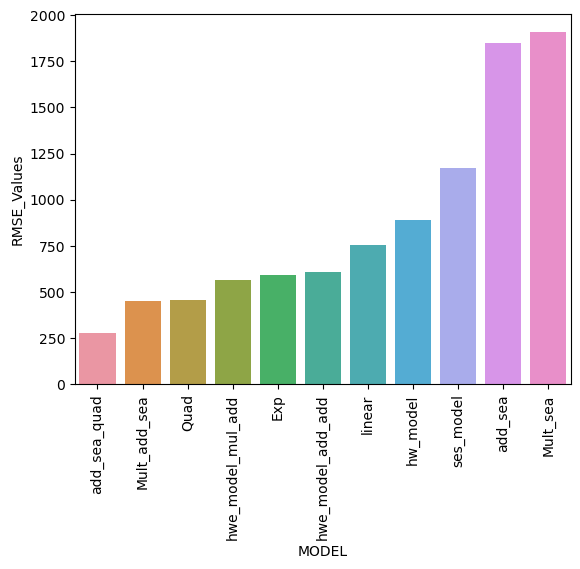

In [80]:
sns.barplot(x = table_rmse.MODEL ,y= table_rmse.RMSE_Values)
plt.xticks(rotation = 90)
plt.show()